In [47]:
import pandas as pd
import numpy as np

In [8]:
F24 = pd.read_excel(r'C:\Users\HP\Desktop\SWC_MATH_CENTER\FALL24.xlsx', dtype={'Student_ID' : str})
F24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Full_Name       2013 non-null   object        
 1   Student_ID      2013 non-null   object        
 2   Sched_Date      2013 non-null   datetime64[ns]
 3   Seconds         2013 non-null   int64         
 4   Start_Time      2013 non-null   object        
 5   Stop_Time       2013 non-null   object        
 6   Subject         2013 non-null   object        
 7   Subject_Course  2013 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 125.9+ KB


In [9]:
F24.head(11)

,Full_Name,Student_ID,Sched_Date,Seconds,Start_Time,Stop_Time,Subject,Subject_Course
0,"RODRIGUEZ, EMILIO G",1160731,2024-11-12,332,10:36:22,10:41:54,ACCT,ACCT 101
1,"DELA CRUZ, MICHAELA A",1125159,2024-11-25,8,14:14:23,14:14:31,ADN,ADN 112
2,"LUCIN, ARIANNA C",1083846,2024-11-25,22,08:48:24,08:48:46,ADN,ADN 112
3,"BANDALA, DULCE E",1132017,2024-10-28,6106,11:56:23,13:38:09,ADN,ADN 112L
4,"CASTRO, ISA",1126369,2024-10-28,14918,10:53:12,15:01:50,ADN,ADN 112L
5,"JIMENEZ, CARLA A",0743538,2024-10-28,16171,10:32:24,15:01:55,ADN,ADN 112L
6,"BANDALA, DULCE E",1132017,2024-10-29,1798,15:08:49,15:38:47,ADN,ADN 112L
7,"ARCE, ISABEL A",1073810,2024-11-12,7,13:05:28,13:05:35,ADN,ADN 112L
8,"ARCE, ISABEL A",1073810,2024-11-12,1009,13:05:42,13:22:31,ADN,ADN 112L
9,"CASILLAS, SUSAN N",1045626,2024-11-12,1042,13:05:15,13:22:37,ADN,ADN 112L


How many students did we serve last year?

In [14]:
print(F24['Student_ID'].nunique())

366


how many Tutor hours did we porvide to those students?

In [24]:
print(f"{round((F24['Seconds'].sum())/3600, 1)} hours\nor\n{round((F24['Seconds'].sum())/3600/24, 1)} days")

666.7 hours
or
27.8 days


Greaat, we also helped out in all of this uniqe classes

In [38]:
print(F24['Subject_Course'].nunique())

51


In [50]:
F24_MATH = F24[F24["Subject"] == "MATH"]  # Filter only MATH subjects
F24_MATH = F24_MATH.groupby("Subject_Course")["Seconds"].sum().reset_index()  # Group and sum
# Convert seconds to hours and round up
F24_MATH["Hours"] = np.ceil(F24_MATH["Seconds"] / 3600)

# Drop the original seconds column if not needed
F24_MATH = F24_MATH.drop(columns=["Seconds"])
F24_MATH.head(17)  # Display first few rows


,Subject_Course,Hours
0,MATH 100,7.0
1,MATH 101,63.0
2,MATH 104,32.0
3,MATH 110,3.0
4,MATH 119,22.0
5,MATH 120,20.0
6,MATH 121,26.0
7,MATH 122,11.0
8,MATH 130,1.0
9,MATH 140,2.0


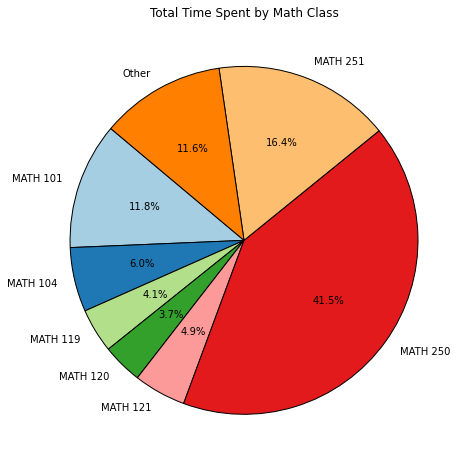

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total hours
total_hours = F24_MATH["Hours"].sum()

# Identify courses contributing less than 3%
F24_MATH["Percentage"] = (F24_MATH["Hours"] / total_hours) * 100
small_courses = F24_MATH["Percentage"] < 3

# Aggregate small courses into "Other"
if small_courses.any():
    other_hours = F24_MATH.loc[small_courses, "Hours"].sum()
    
    # Keep only large courses
    F24_MATH = F24_MATH.loc[~small_courses]
    
    # Create "Other" category as a new DataFrame and concatenate
    other_df = pd.DataFrame([{"Subject_Course": "Other", "Hours": other_hours}])
    F24_MATH = pd.concat([F24_MATH, other_df], ignore_index=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    F24_MATH["Hours"], 
    labels=F24_MATH["Subject_Course"], 
    autopct="%1.1f%%",  
    colors=plt.cm.Paired.colors,  
    startangle=140,  
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title("Total Time Spent by Math Class")

# Show the plot
plt.show()
